Deep Multi-class Classification


## Objective
- learning comlicated pattern using deep hidden layer
- use different technic like ReLU, Dropout, which might improve performance
- visualize and anaylsys the reuslt
- understanding overfitting[texte du lien](https://)



In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False


print(f"PyTorch version: {torch.__version__}")
print(f"available device: {'cuda' if torch.cuda.is_available() else 'cpu'}")

PyTorch version: 2.9.0+cpu
available device: cpu


In [64]:

wine_data = load_wine()
# X : (178,13), y(178,1)
X, y = wine_data.data, wine_data.target

X_temp, X_test,y_temp,y_test = train_test_split(X,y,test_size=0.2, random_state = 42, stratify = y)

X_train, X_val, y_train,y_val = train_test_split(X_temp,y_temp,test_size=0.25, random_state=42, stratify=y_temp)

In [65]:
# normalization, adapt fit! to only training
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)
scaler.transform(X_test)
print()

In [66]:
def convert_to_tensor(X_train,x_val,x_text,y_train,y_val,y_test):
  inputs_train = torch.tensor(X_train, dtype=torch.float32)
  inputs_val = torch.tensor(X_val, dtype=torch.float32)
  inputs_test = torch.tensor(X_test, dtype=torch.float32)
  labels_train = torch.tensor(y_train, dtype=torch.long)
  labels_val = torch.tensor(y_val, dtype=torch.long)
  labels_test = torch.tensor(y_test, dtype=torch.long)

  return inputs_train, inputs_val, inputs_test, labels_train,labels_val,labels_test



In [67]:
inputs_train, inputs_val, inputs_test, labels_train,labels_val,labels_test =\
convert_to_tensor(X_train,X_val,X_test,y_train,y_val,y_test)

In [68]:
class Net_3h(nn.Module):
  def __init__(self, n_inputs, n_hidden1, n_hidden2,n_hidden3, n_outputs,dropout_rate = 0.3):
    super().__init__()

    # define layer
    self.fc1 = nn.Linear(n_inputs, n_hidden1)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(dropout_rate)
    self.fc2 = nn.Linear(n_hidden1, n_hidden2)
    self.fc3 = nn.Linear(n_hidden2,n_hidden3)
    self.fc4 = nn.Linear(n_hidden3,n_outputs)


  def forward(self,x):
    # 첫번째 은닉층
    x = self.drop(self.relu(self.fc1(x)))
    x = self.drop(self.relu(self.fc2(x)))
    x = self.drop(self.relu(self.fc3(x)))
    return self.fc4(x)

class Net_withoutdrp(nn.Module):
  def __init__(self, n_inputs, n_hidden1, n_hidden2,n_hidden3, n_outputs):
    super().__init__()

    # define layer
    self.fc1 = nn.Linear(n_inputs, n_hidden1)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(n_hidden1, n_hidden2)
    self.fc3 = nn.Linear(n_hidden2,n_hidden3)
    self.fc4 = nn.Linear(n_hidden3,n_outputs)


  def forward(self,x):
    # 첫번째 은닉층
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    return self.fc4(x)
class Net_4h(nn.Module):
  def __init__(self, n_inputs, n_hidden1,n_hidden2, n_hidden3,n_hidden4, n_outputs,dropout_rate = 0.3):
    super().__init__()

    # define layer
    self.fc1 = nn.Linear(n_inputs, n_hidden1)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(dropout_rate)
    self.fc2 = nn.Linear(n_hidden1, n_hidden2)
    self.fc3 = nn.Linear(n_hidden2,n_hidden3)
    self.fc4 = nn.Linear(n_hidden3,n_hidden4)
    self.fc5 = nn.Linear(n_hidden4,n_outputs)


  def forward(self,x):
    x = self.drop(self.relu(self.fc1(x)))
    x = self.drop(self.relu(self.fc2(x)))
    x = self.drop(self.relu(self.fc3(x)))
    x = self.drop(self.relu(self.fc4(x)))
    return self.fc5(x)

class Net_5h(nn.Module):
  def __init__(self, n_inputs, n_hidden1, n_hidden2, n_hidden3,n_hidden4,n_hidden5, n_outputs,dropout_rate = 0.3):
    super().__init__()

    # define layer
    self.fc1 = nn.Linear(n_inputs, n_hidden1)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(dropout_rate)
    self.fc2 = nn.Linear(n_hidden1, n_hidden2)
    self.fc3 = nn.Linear(n_hidden2,n_hidden3)
    self.fc4 = nn.Linear(n_hidden3,n_hidden4)
    self.fc5 = nn.Linear(n_hidden4,n_hidden5)
    self.fc6 = nn.Linear(n_hidden5,n_outputs)


  def forward(self,x):
    x = self.drop(self.relu(self.fc1(x)))
    x = self.drop(self.relu(self.fc2(x)))
    x = self.drop(self.relu(self.fc3(x)))
    x = self.drop(self.relu(self.fc4(x)))
    x = self.drop(self.relu(self.fc5(x)))
    return self.fc6(x)


In [69]:
# hypter parameter
n_inputs = inputs_train.shape[1]
n_hidden1 = 256
n_hidden2 = 128
n_hidden3 = 64
n_hidden4 = 32
n_hidden5 = 16
n_outputs = 3 # # of class
dropout_rate = 0.3
learning_rate = 0.001

In [70]:
model1 = Net_3h( n_inputs, n_hidden1, n_hidden2,n_hidden3,n_outputs,dropout_rate)
model4 = Net_withoutdrp( n_inputs, n_hidden1, n_hidden2,n_hidden3,n_outputs)
model2 = Net_4h( n_inputs, n_hidden1, n_hidden2,n_hidden3,n_hidden4,n_outputs,dropout_rate)
model3 = Net_5h( n_inputs, n_hidden1, n_hidden2,n_hidden3,n_hidden4,n_hidden5,n_outputs,dropout_rate)

In [71]:
# calculate the number of parameter -> numel->number of parameter
# p.requires_grad -> count the learnable parameter
sum(p.numel() for p in model1.parameters() if p.requires_grad)

44931

In [72]:
# loss function : CrossEntropyLoss(Softmax + NLLLoss)
criterion= nn.CrossEntropyLoss()
# Optimizer : Adam(Adaptive Moment Estimation)
opt1 = optim.Adam(model1.parameters(),lr = learning_rate)
opt2 = optim.Adam(model2.parameters(),lr = learning_rate)
opt3 = optim.Adam(model3.parameters(),lr = learning_rate)
opt4 = optim.Adam(model4.parameters(),lr = learning_rate)

In [73]:
# Evaluation(Dropout,BatchNorm -> deativiation)
def evaluate_model(model,inputs,labels):
  model.eval()
  with torch.no_grad():
    # deactivate gradient calculation
    outputs = model(inputs)
    loss = criterion(outputs,labels)
    # index 0: values , index 1 : indexs
    pred = torch.max(outputs,1)[1]
    # predicted : index(class number)
    # accuracy calculation
    correct = (pred == labels).sum().item()
    acc = correct / len(labels)
  return loss.item(), acc

In [74]:
# outputs ? logits that model predicts
temp_outputs = torch.tensor([[2.5, 1.1, 0.3],
                             [1.0, 1.9, 0.7]])
torch.max(temp_outputs,1)

torch.return_types.max(
values=tensor([2.5000, 1.9000]),
indices=tensor([0, 1]))

In [75]:
def train_model(model, opt,inputs_train,labels_train, inputs_val, labels_val, num_epochs =200, print_step = 20):
  # record history
  train_losses = []
  val_losses = []
  train_accs = []
  val_accs = []
  print(f"{'Epoch' :^10} | {'Train Loss' :^12}| {'Val Loss' :^12}| {'Train acc' :^12}| {'val acc' :^12}")
  print('='*70)
  #train
  for epoch in range(num_epochs):
    model.train()
    outputs = model(inputs_train)
    opt.zero_grad()
    loss = criterion(outputs, labels_train)
    loss.backward()
    opt.step()

    #eval
    #train data
    train_loss, train_acc = evaluate_model(model, inputs_train,labels_train)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    #val data
    val_loss, val_acc = evaluate_model(model, inputs_val,labels_val)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    if (epoch+1)% print_step == 0 :
      print(f'{epoch+1:^12} | {train_loss:^12.4f} | {val_loss:12.4f}|{train_acc:^12.4f}|{val_acc:^12.4f}')
  return {
      'train_losses': train_losses,
      'val_losses' : val_losses,
      'train_accs' : train_accs,
      'val_accs': val_accs
  }




In [76]:
history1 = train_model(model1,opt1, inputs_train,labels_train, inputs_val, labels_val,num_epochs =2000, print_step = 100)
history2 = train_model(model2,opt2, inputs_train,labels_train, inputs_val, labels_val,num_epochs =2000, print_step = 100)
history3 = train_model(model3,opt3, inputs_train,labels_train, inputs_val, labels_val,num_epochs =2000, print_step = 100)
history4 = train_model(model4,opt4, inputs_train,labels_train, inputs_val, labels_val,num_epochs =2000, print_step = 100)

  Epoch    |  Train Loss |   Val Loss  |  Train acc  |   val acc   
    100      |    0.7902    |       0.8671|   0.6604   |   0.5833   
    200      |    0.6209    |       0.7386|   0.6792   |   0.5833   
    300      |    0.5995    |       0.7343|   0.6792   |   0.5833   
    400      |    0.5792    |       0.7057|   0.6792   |   0.6667   
    500      |    0.5663    |       0.6970|   0.7075   |   0.6111   
    600      |    0.5616    |       0.7119|   0.7075   |   0.6111   
    700      |    0.5536    |       0.6919|   0.7358   |   0.5833   
    800      |    0.5387    |       0.6863|   0.7264   |   0.6389   
    900      |    0.5227    |       0.7126|   0.7453   |   0.6667   
    1000     |    0.5100    |       0.6725|   0.7453   |   0.6389   
    1100     |    0.4851    |       0.7535|   0.7453   |   0.6667   
    1200     |    0.4577    |       0.6155|   0.7925   |   0.7500   
    1300     |    0.3578    |       0.7394|   0.8585   |   0.8333   
    1400     |    0.1515    |      

this is very simple example, so 3 hidden layer already shows good performance. Nethertheless, if we add more hidden layer or dropout, it might make model performance worse


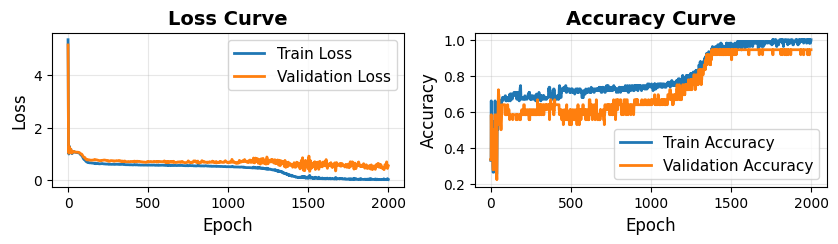

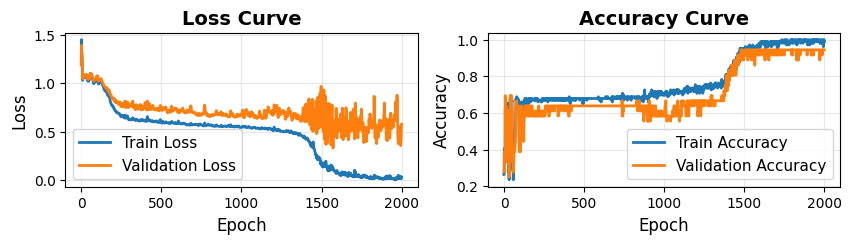

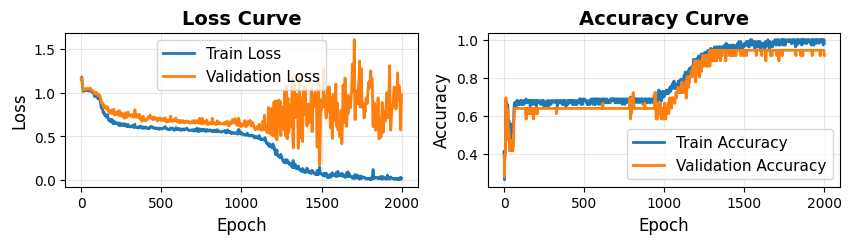

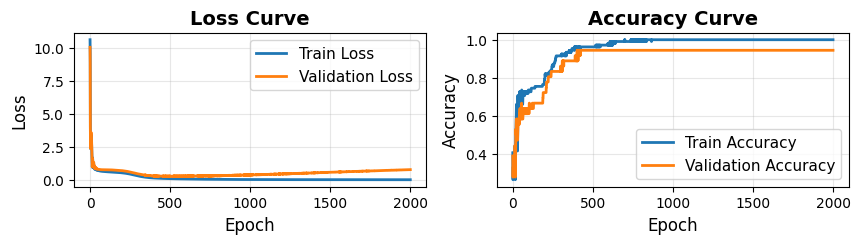

In [78]:
""
def plot_training_history(history):
    """
    학습 과정을 시각화하는 함수


    Args:
        history: 학습 이력 딕셔너리
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 2))


    # 손실(Loss) 그래프
    axes[0].plot(history['train_losses'], label='Train Loss', linewidth=2)
    axes[0].plot(history['val_losses'], label='Validation Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Loss Curve', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)


    # 정확도(Accuracy) 그래프
    axes[1].plot(history['train_accs'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history['val_accs'], label='Validation Accuracy', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].set_title('Accuracy Curve', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)

plot_training_history(history1)
plot_training_history(history2)
plot_training_history(history3)
plot_training_history(history4)
print("=" * 50)
print("this is very simple example, so 3 hidden layer already shows good performance. Nethertheless, if we add more hidden layer or dropout, it might make model performance worse")

In [79]:
def test_model(model, input_test, labels_test):
  test_loss, test_acc = evaluate_model(model,input_test,labels_test)
  print("="* 50)
  print("test data performance")
  print("="*50)
  print(f"loss : {test_loss:.4f}")
  print(f"acc : {test_acc:.4f} ({test_acc*100:.2f}%)"
  )

  # predict result
  model.eval()
  with torch.no_grad():
    outputs = model(input_test)
    _,pred = torch.max(outputs,1)
  # calculate accurancy of each class
  for class_idx in range(3) :
    class_mask = (labels_test == class_idx)
    class_correct = (pred[class_mask] == labels_test[class_mask]).sum().item()
    class_total = class_mask.sum().item()
    class_acc = class_correct/class_total if class_total > 0 else 0
    print(f"class: {class_idx} acc: {class_acc*100:.2f}%")

In [80]:
test_model(model1,inputs_test,labels_test)

test data performance
loss : 0.1607
acc : 0.9444 (94.44%)
class: 0 acc: 91.67%
class: 1 acc: 100.00%
class: 2 acc: 90.00%


In [82]:
###### Predict
def predict_sample(model, inputs, labels, sample_idx=0):
  # predict prob and acc on individual sample
  model.eval()
  # single sample choice
  sample_input = inputs[sample_idx : sample_idx+1]
  true_label = labels[sample_idx].item()

  with torch.no_grad():
    output=model(sample_input)
    print(output)
    prob = torch.softmax(output, dim=1)[0]
    print(prob)
    pred = torch.argmax(prob).item()

  for i , prob in enumerate(prob):
    print(f'class {i}:{prob:.4f}')

predict_sample(model1, inputs_test,labels_test,sample_idx=20)



tensor([[-6.5254,  8.3596, -8.4203]])
tensor([3.4318e-07, 1.0000e+00, 5.1590e-08])
class 0:0.0000
class 1:1.0000
class 2:0.0000
